In [1]:
#In the previous mission, we tried to optimize our predictions by creating and selecting the features used to train
#our model. Maybe changing ml model will help us out also.

#So far, we've been using the logistic regression algorithm to train our models, however there are hundreds of
#different machine learning algorithms from which we can choose. Each algorithm has different strengths and weaknesses,
#and so we need to select the algorithm that works best with our specific data— in this case our Kaggle competition.

#The process of selecting the algorithm which gives the best predictions for your data is called "MODEL SELECTION"
#we're going work with two new algorithms: k-nearest neighbors and random forests.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#code snippet:
import pandas as pd
train = pd.read_csv('train_modified.csv')
holdout = pd.read_csv('holdout_modified.csv')

In [3]:
#We're going to train our models using all the columns in the train dataframe. This will cause a small amount of
#overfitting due to collinearity (as we discussed in the previous mission), but having more features will allow us to
#more thoroughly compare algorithms.

#So we have something to compare to, we're going to train a logistic regression model. We'll use cross validation to
#get a baseline score.

In [3]:
#code snippet:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

all_X = train.drop(['Survived','PassengerId'],axis=1)
all_y = train['Survived']

lr=LogisticRegression()
scores=cross_val_score(lr,all_X,all_y,cv=10)
accuracy_lr=scores.mean()
print(scores,"\n",accuracy_lr)

[0.76666667 0.82222222 0.78651685 0.87640449 0.83146067 0.80898876
 0.82022472 0.82022472 0.85393258 0.85227273] 
 0.823891442515038


C:\Users\berka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

## Training a Model using K-Nearest Neighbors

In [4]:
# The logistic regression baseline model from the previous screen scored 82.4%.

# Model	Cross-validation score	Kaggle score
# Previous best Kaggle score	82.3%	78.0%
# Logistic regression baseline	82.4%	?

#The logistic regression algorithm works by calculating linear rships between the features and the target variable and
#using those to make predictions. Let's look at an algorithm that makes predictions using a different method.

#The k-nearest neighbors algorithm finds the observations in our training set most similar to the observation in our
#test set, and uses the average outcome of those 'neighbor' observations to make a prediction. The 'k' is the number
#of neighbor observations used to make the prediction.

#If you'd like to learn more about the k-nearest neighbors algorithm, you might like to check out doc about KNeighborsC
#lassifier

#Just like it does for logistic regression, scikit-learn has a class that makes it easy to use k-nearest neighbors to
#make predictions, neighbors.KNeighborsClassifier.

#The optional n_neighbors argument sets the value of k when predictions are made. The default value of n_neighbors is 5
# but we're going to start by building a simple model that uses the closest neighbor to make our predictions.

In [5]:
#code snippet:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, all_X, all_y, cv=10)
accuracy_knn = scores.mean()
accuracy_knn

0.7857382816933379

## Exploring Different K Values

In [6]:
# The k-nearest neighbors model we trained in the previous screen had an accuracy score of 78.6%, worse than our
#baseline score of 82.4%.

# Model	Cross-validation score	Kaggle score
# Previous best Kaggle score	82.3%	78.0%
# Logistic regression baseline	82.4%	?
# K-nearest neighbors, k == 1	78.6%	?

#Besides default settings, we can vary the settings of each model— for instance the value of k in our k-nearest
#neighbors model. This is called hyperparameter optimization.

#We can use a loop and Python's inbuilt range() class to iterate through different values for k and calculate the
#accuracy score for each different value. We will only want to test odd values for k to avoid ties,where both 'survived
#and 'died' outcomes would have the same number of neighbors.

#Let's use this technique to calculate the accuracy of our model for values of k from 1-49, storing the results in a
#dictionary.

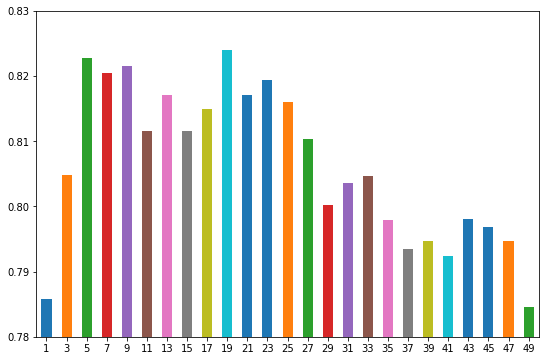

In [7]:
#code snippet:
import matplotlib.pyplot as plt

def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, all_X, all_y, cv=10)
    accuracy_knn = scores.mean()
    knn_scores[k] = accuracy_knn

plot_dict(knn_scores)
plt.show()

## Hyperparameter Optimization with Grid Search

In [8]:
#Looking at our plot from the previous screen we can see that a k value of 19 gave us our best score, and checking the
#knn_scores dictionary we can see that the score was 82.4%, identical to our baseline (if we didn't round the numbers
#you would see that it's actually 0.01% less accurate).

# Model	Cross-validation score	Kaggle score
# Previous best Kaggle score	82.3%	78.0%
# Logistic regression baseline	82.4%	?
# K-nearest neighbors, k == 1	78.6%	?
# K-nearest neighbors, k == 19	82.4%	?

#The technique we just used is called grid search - we train a number of models across a 'grid' of values and then
#searched for the model that gave us the highest accuracy.Sklearn has a class to perform grid search, model_selection
#GridSearchCV(). The 'CV' in the name indicates that we're performing both grid search and cross val at the same time.

#By creating a dictionary of parameters and possible values and passing it to the GridSearchCV object we can automate
#the process. Here's what the code from the prev screen would look like, when implemented using the GridSearchCV class.
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

hyperparameters = {
    "n_neighbors": range(1,50,2)
}
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

print(grid.best_params_)
print(grid.best_score_)

#Our final step was to print the GridSearchCV.best_params_ and GridSearchCV.best_score_ attr to retrieve the params
#of the best-performing model, and the score it achieved.

#We can also use GridSearchCV to try combinations of different hyperparameters. Say we wanted to test values of
#3 dif tree algorithms. for the algorithm parameter and values of 1, 3, and 5 for the n_neighbors algo
#parameter. GridSearchCV would train and test 9 models (3 for the first hyperparameter times 3 for the second hyperparameter
#shown in the diagram below.



{'n_neighbors': 19}
0.8237934904601572


In [9]:
#code snippet:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,param_grid=hyperparameters,cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.8282828282828283


## Submitting KNN Predictions to Kaggle - Attempt2.5

In [10]:
# The cross-validation score for the best performing model was 82.7%, better than our baseline model.

# Model	Cross-validation score	Kaggle score
# Previous best Kaggle score	82.3%	78.0%
# Logistic regression baseline	82.4%	?
# K-nearest neighbors, k == 1	78.6%	?
# K-nearest neighbors, k == 19	82.4%	?
# K-nearest neighbors, best model from grid search	82.7%	?

#We can use the GridSearchCV.best_estimator_ attribute to retrieve a trained model with the best-performing hyperparams
best_knn = grid.best_estimator_
#is equivalent to this code where we manually specify the hyperparameters and train the model:
best_knn = KNeighborsClassifier(p=1,algorithm='brute',n_neighbors=5,weights='uniform')
best_knn.fit(all_X,all_y)

#Lets use that model to make preds on the holdout set, submit those preds to Kaggle to see if we have improved overall


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [11]:
#code snippet:
holdout_no_id = holdout.drop(['PassengerId'],axis=1)
best_knn = grid.best_estimator_
holdout_predictions = best_knn.predict(holdout_no_id)

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_1.csv",index=False)

## Random Forests

In [14]:
#When we submit this(knn besthyper,best k attempt) to Kaggle,we'll see it scores 75.6%, less than our best submission
#of 78.0%. While our model could be overfitting due to including all columns, it also seems like k-nearest neighbors
#may not be the best algorithm choice.

# Model	Cross-validation score	Kaggle score
# Previous best Kaggle score	82.3%	78.0%
# Logistic regression baseline	82.4%	
# K-nearest neighbors, k == 1	78.6%	
# K-nearest neighbors, k == 19	82.4%	
# K-nearest neighbors, best model from grid search	82.8%	75.6%

#Let's try another algorithm called random forests. Random forests is a specific type of decision tree algorithm


In [15]:
#code snippet:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()
accuracy_rf

C:\Users\berka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\berka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.8070125411417546

## Tuning our Random Forests Model with GridSearch

In [16]:
# Using the default settings, our random forests model obtained a cross validation score of 80.7%.

# Model	Cross-validation score	Kaggle score
# Previous best Kaggle score	82.3%	78.0%
# Logistic regression baseline	82.4%	?
# K-nearest neighbors, k == 1	78.6%	?
# K-nearest neighbors, k == 19	82.4%	?
# K-nearest neighbors, best model from grid search	82.8%	75.6%
# Random forests, default hyperparameters	80.7%	?

#Just like we did with the k-nearest neighbors model, we can use GridSearchCV to test a variety of hyperparams to find
#the best performing model.

#The best way to see a list of available hyperparameters is by checking the documentation for the classifier— in this
#case, the doc for RandomForestClassifier. Let's use grid search to test out combinations of the following hyperparams:

# criterion: "entropy" or "gini"
# max_depth: 5 or 10
# max_features: "log2" or "sqrt"
# min_samples_leaf: 1 or 5
# min_samples_split: 3 or 5
# n_estimators: 6 or 9

In [17]:
#code snippet:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf,param_grid=hyperparameters,cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
0.8428731762065096


C:\Users\berka\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Submitting Random Forest Predictions to Kaggle - Attempt3

In [17]:
#The cross-validation score for the best performing model was 84.3%, making it the best cv score we've obtained 
#Let's train it on the holdout data and create a submission file to see how it performs on the Kaggle.

In [18]:
# The `GridSearchCV` object is stored in memory from
# the previous screen with the variable name `grid`
best_rf = grid.best_estimator_
holdout_predictions = best_rf.predict(holdout_no_id)

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_2.csv",index=False)